# Policy-Based Methods

Various methods

* value based
* policy based
* combine both into actor-critic methods

## Why policy based methods

Why do we need to find optimal policies when value based methods seem to do well?

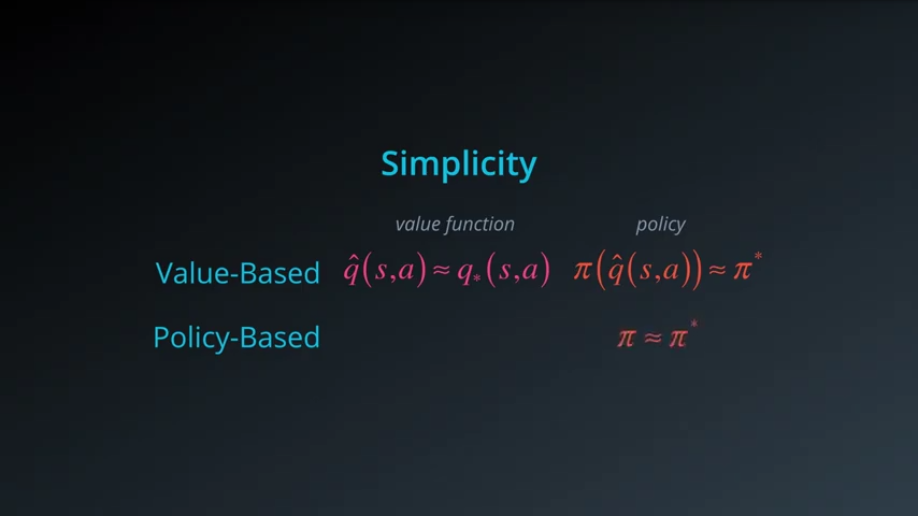

What is a policy?

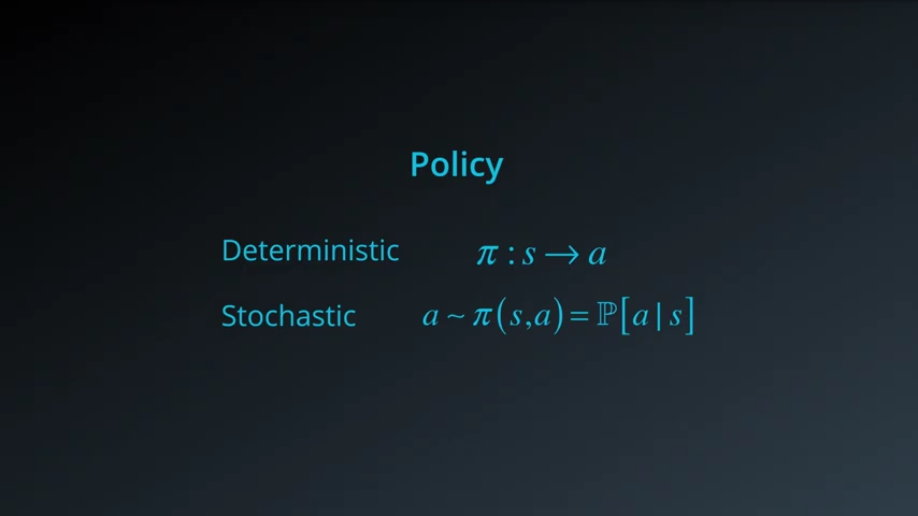

A value based approach tends to learn a deterministic or near deterministic policy. Ideally we want a stochastic policy so that we are less trapped by things like the max in an epilson greedy.

In a policy based approach the desired stochastic policy can be learned. Aliased states can be dealt with. We can learn the desired stochastic policy that is appropriate, especially for continuous spaces.

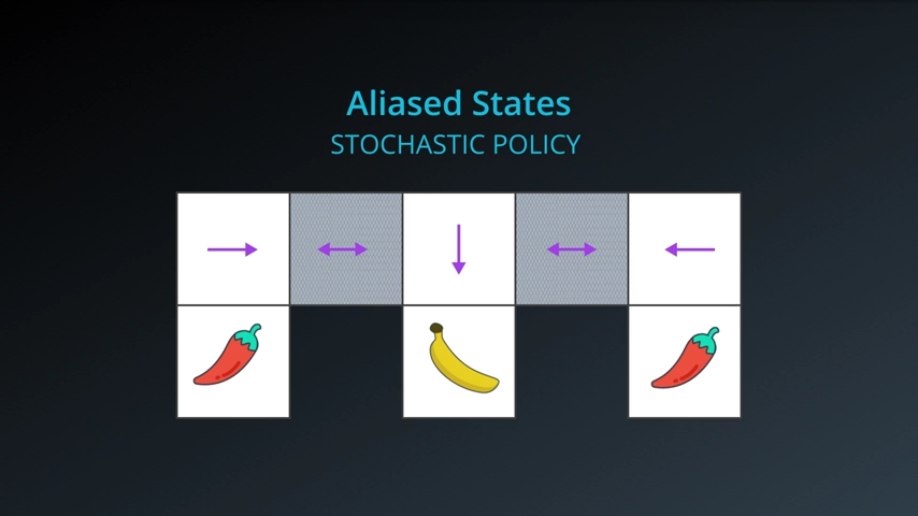

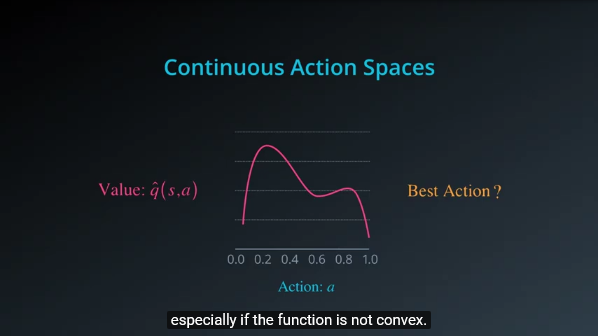

## Policy Function Approximation

Can expand policy based methods to cover large and continuous state spaces by using a function to approximate the policy, just like value function approximation.

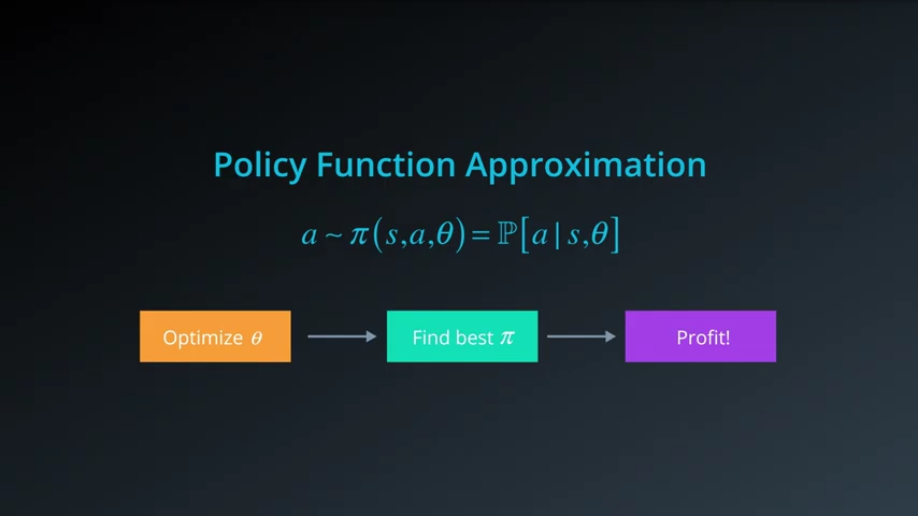

Simple is linear function with softmax policy to make it stoachastic, expodientiate the linear function and normalizes it by the sum of expodentials for all actions.

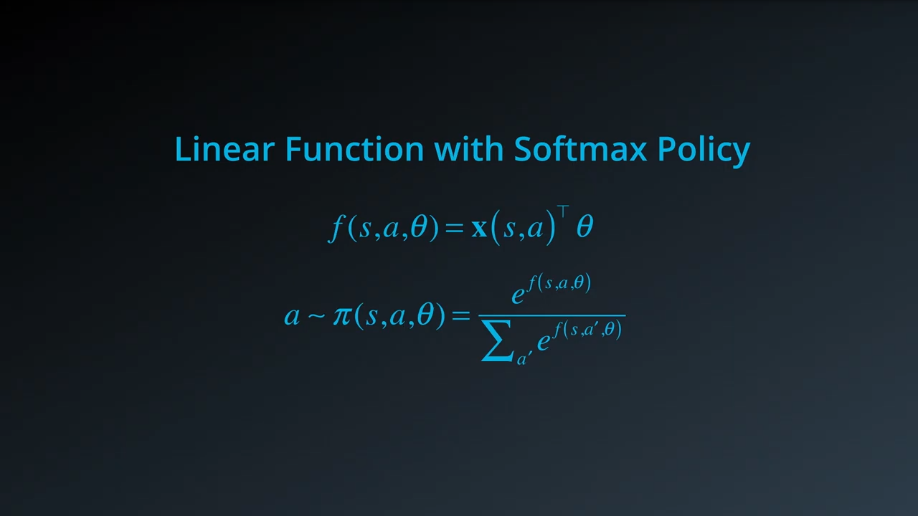

Example, Mt car with position and velocity, actions left, right, no push. Can make the action space continous instead of discrete left, right, no push. When we have a policy with a continuous action space we can use a Gaussian policy.

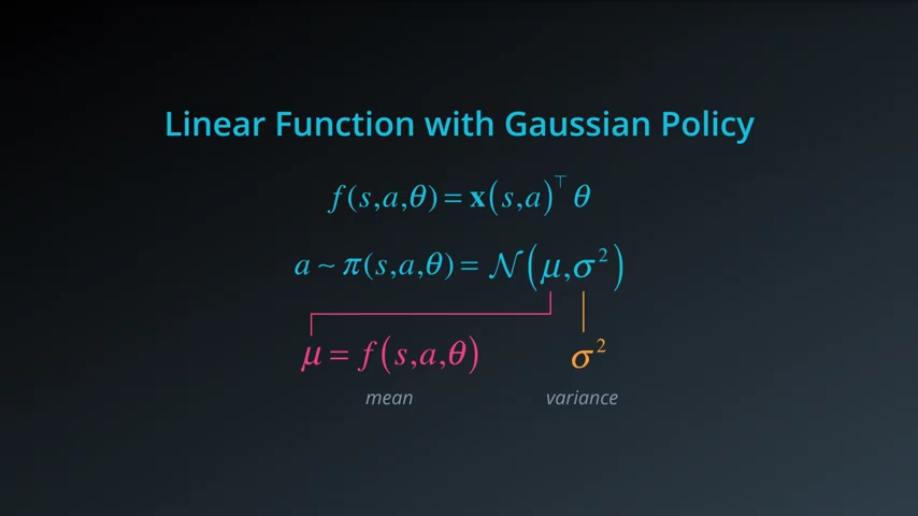

How to get the best policy? How to grade it? Needs to be a function of the policy parameters, a function of the rewards obtained under that policy. Objective function is defined as

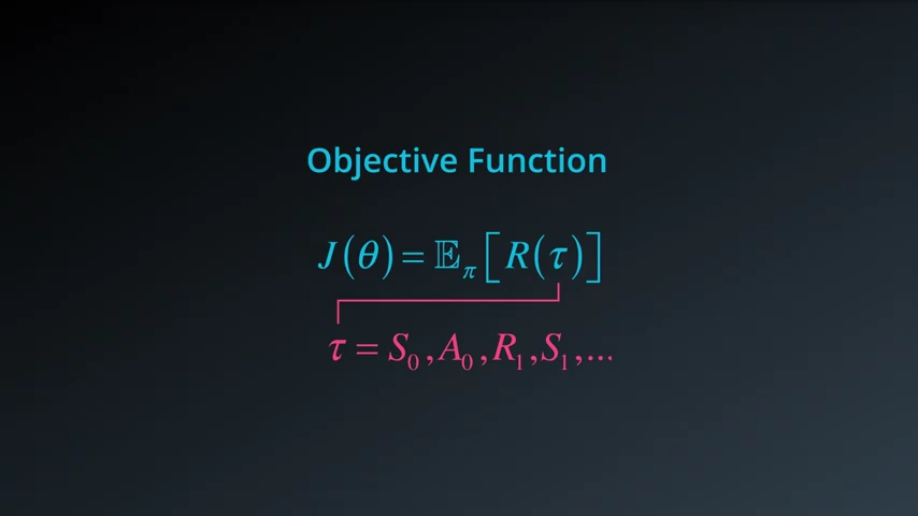

What do the state values look like? One option is to use the mean of the return of the first time-step G1, equiv to the value of the starting state. We can also try to average or expected state value, which should be better than just using the first time step G1.

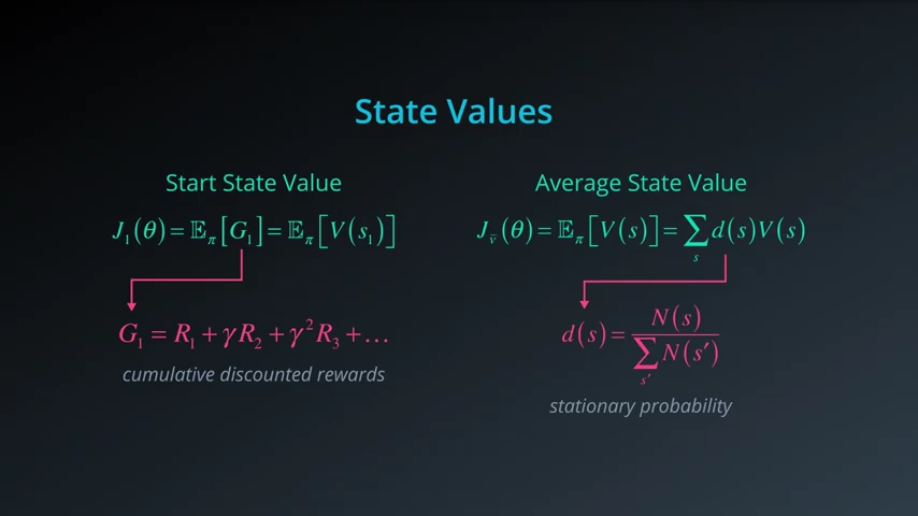

Related is the average action value, or Q-value, computed in a similar way.

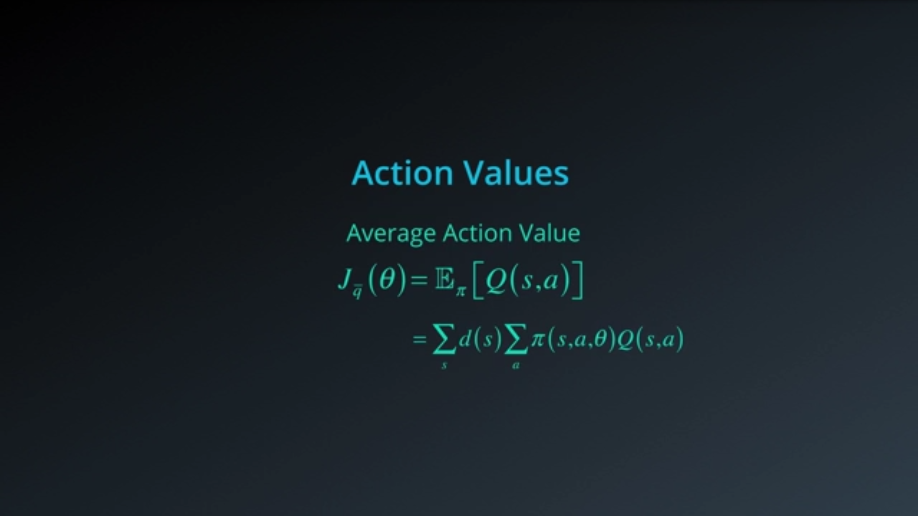

The goal of encoding the policy is so we don't have to keep track of state values or action values. A measure that we can compute direction to do this is the average reward at each time step

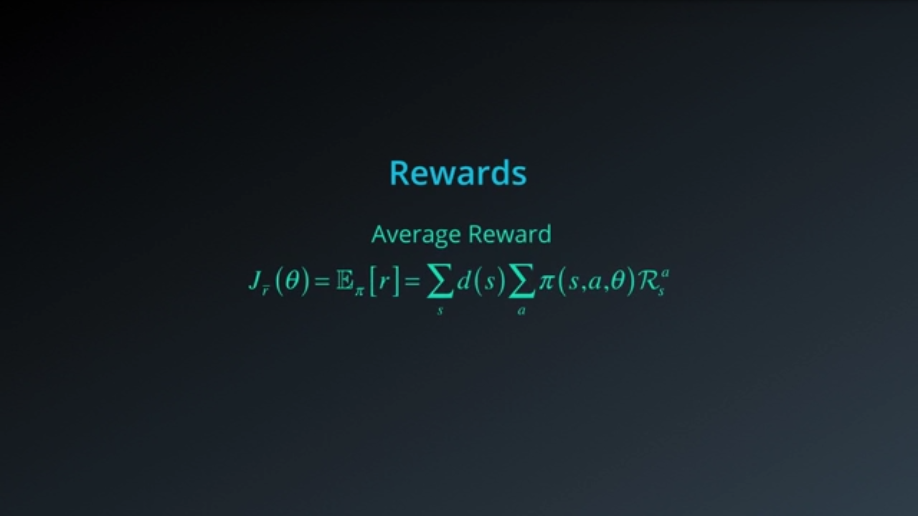


## Stochastic Policy Search

Objective function J can be quite complex. 

So start, we don't know anything about this surface, so how do we find the spot where the objective function value is at its maximum? 

Our first approach, is to search for the best policy by repeatedly nudging it around. Starting with arbitary policy pi, evaluate it by applying it in the environment. The policy will lie somewhere on the objective function surface

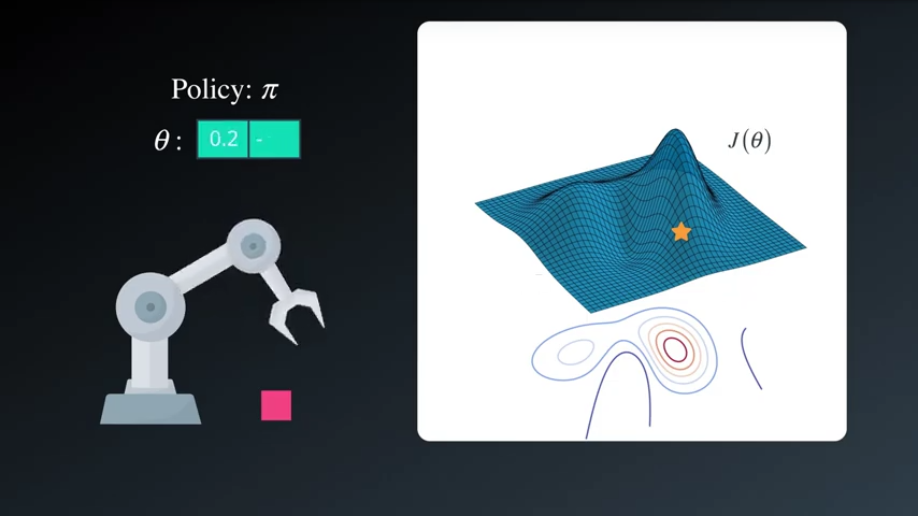

We can sample again with a nudge by applying some small Gaussian noise to the parameters. If the new policy is better than the best value so far, we set this policy to be the best policy and iterative, this is called "hill climbing"

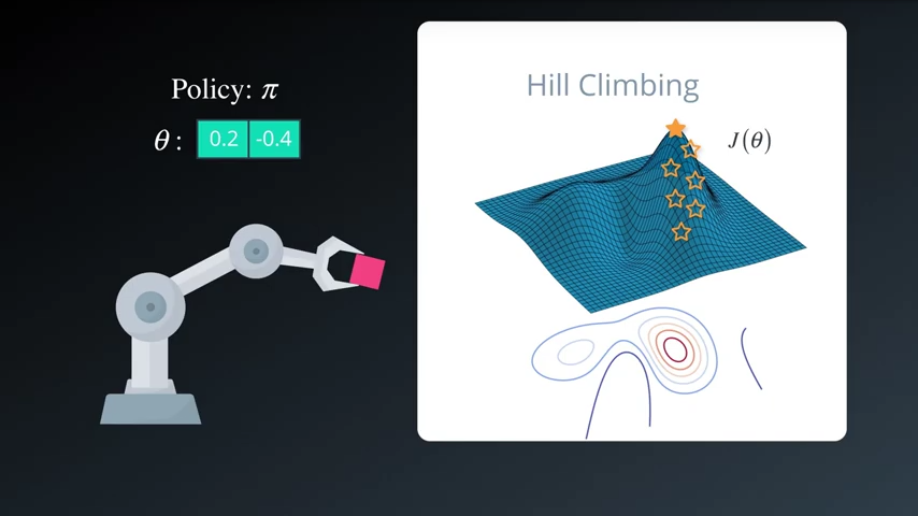

One variation is to create a small number of samples at each iteration and pick the best among them (sounds similar to a partical filter), this is more likely to put us in the right direction more quickly, reduces the risk of getting stuck in a submoptimal policy, and is called steepest ascent hill climbing, that has variations like simulated annealing (heat and cool and random restarts

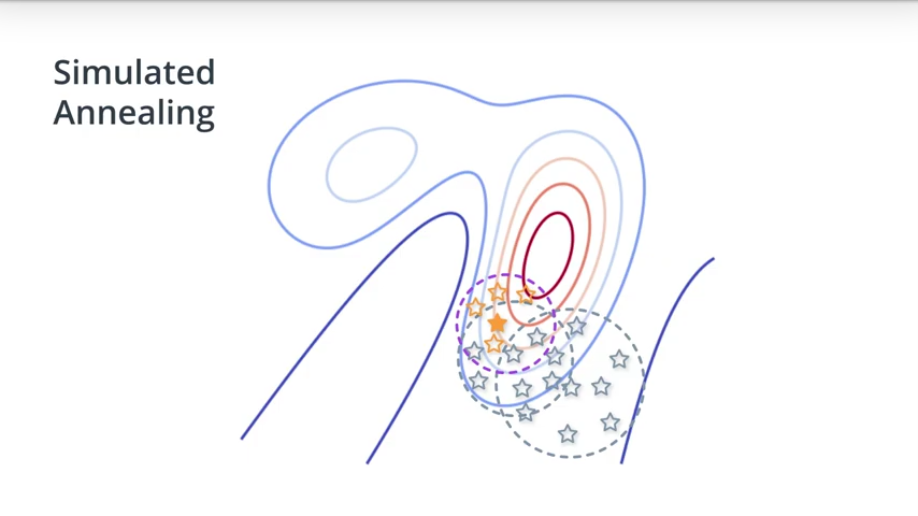) 

Adaptive noise reduces the variance of the Gaussian noise we add, but if we don't find a good policy, we should increase the variance (like a Kalman filter

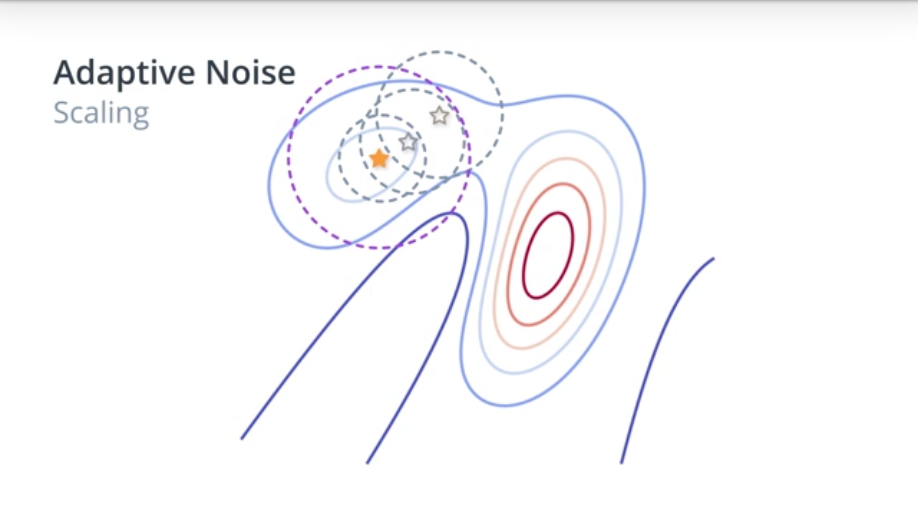)


## Policy Gradients

If you can compute the policy, objective function J, and the gradient of the objective function, it would allow more efficient steps. Gradient always points to the direction of maximum change.

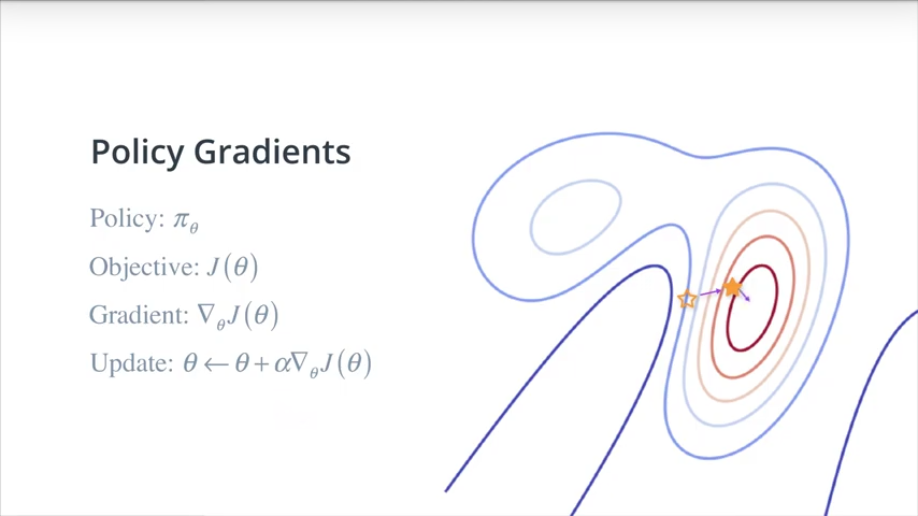

If the objective function is not differentiable, one cannot find the gradient direction, so use finite differences instead (like a jacobian matrix).

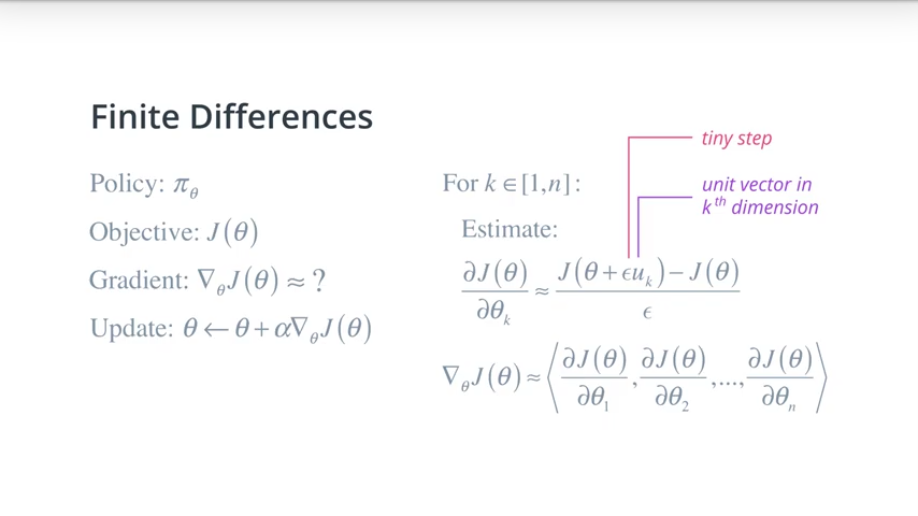

If you have access to the underlying polcy function (because you designed it), then it is more efficient to try and compute the gradient analtically. But, computing the gradient of the expected value of some function can be hard

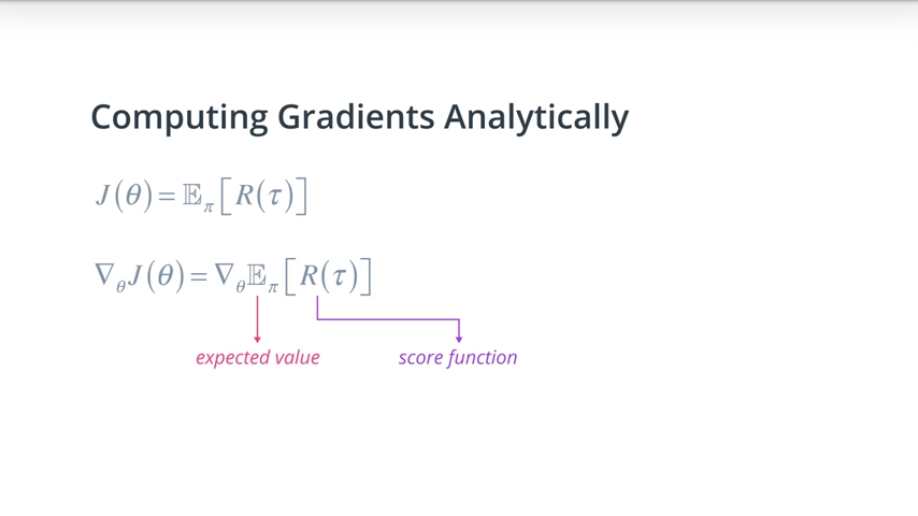

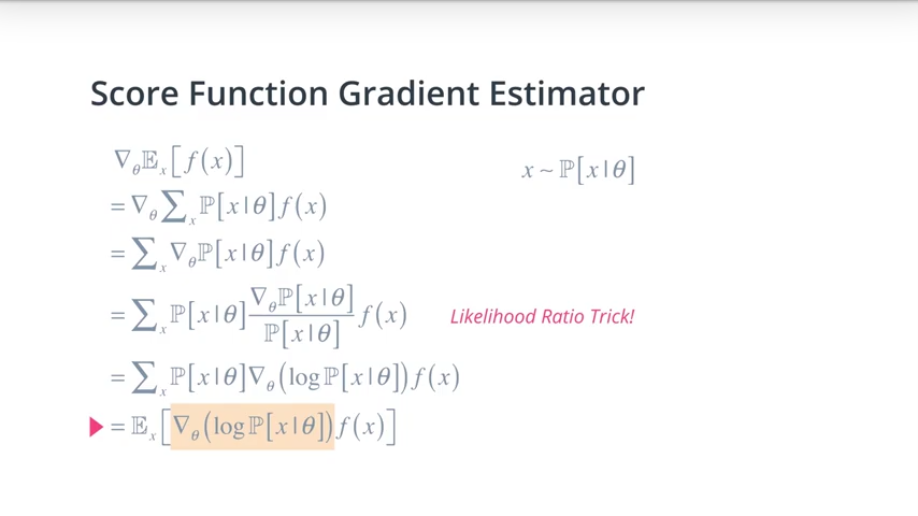

Then, we can compute the score function by interacting with the environment and summing up the rewards we get. If we had the policy function implemented using some approximator like a DNN, then we can compute the log of the output probabilities and the derivative, giving us an update rule of

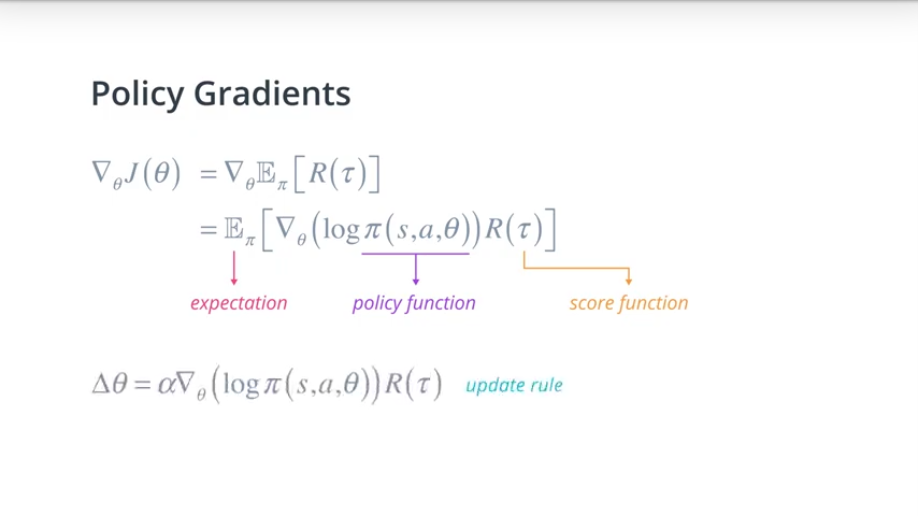

##  Monte Carlo Policy Gradients

Distinct pisodes

First compute the gradient of the log probabilities produced by the policy function, and multiply by the returns from the rest of the episode, the score function, then update the weights with some small learning rate alpha

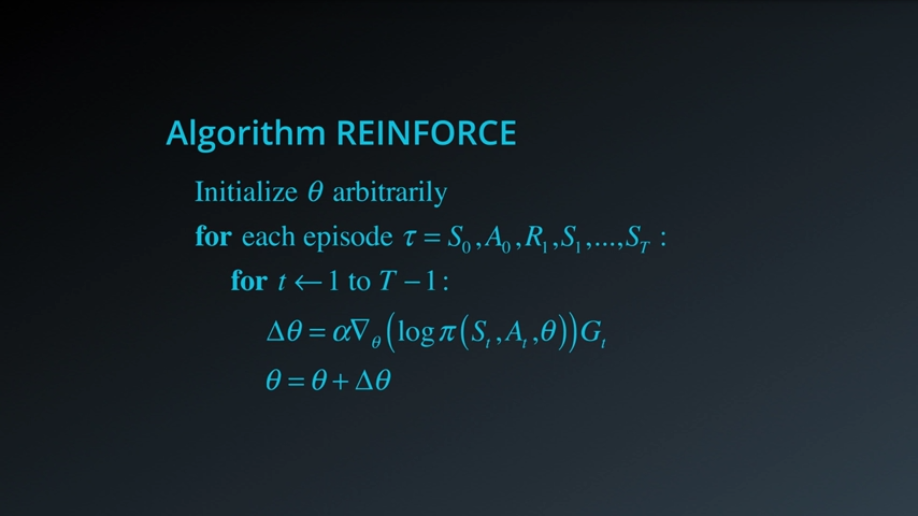 

This is called the inforce algorithm.

## Constrained Policy Gradients

Up until now, the above policy based methods only use the goodness of a policy as the objective function. This can result in policies that are close to each other in the objective function space, but wildly different in how they behave, important for control problems

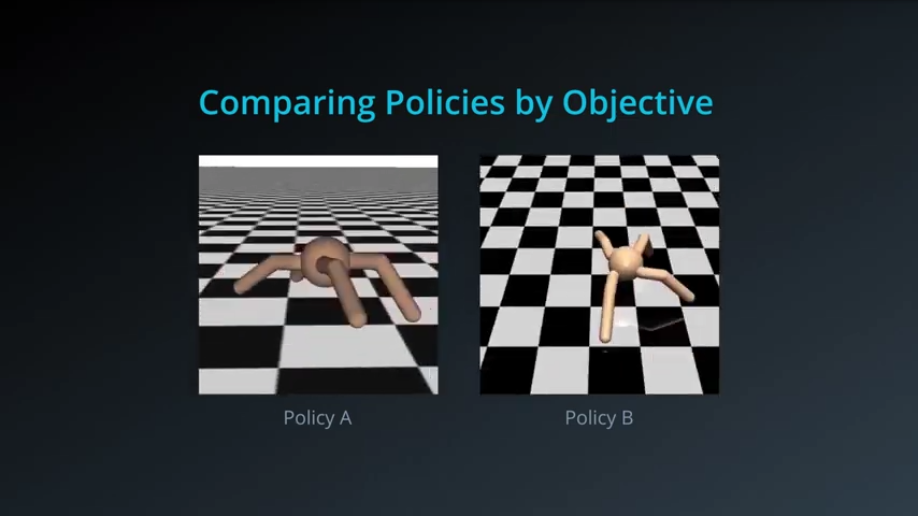

We can try and intermediate solution, but may end up with an odd policy, the learning process can end up unstable and inefficient

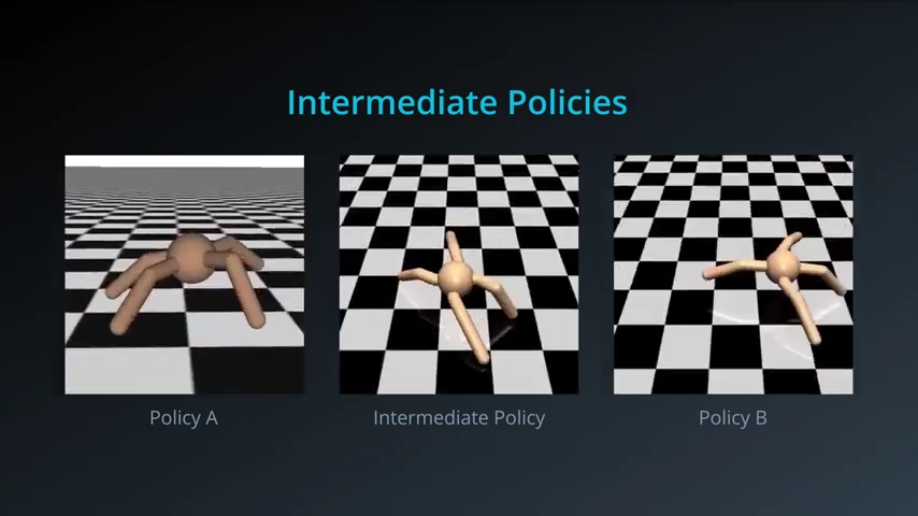

Can limit the differnce allowed between two policies

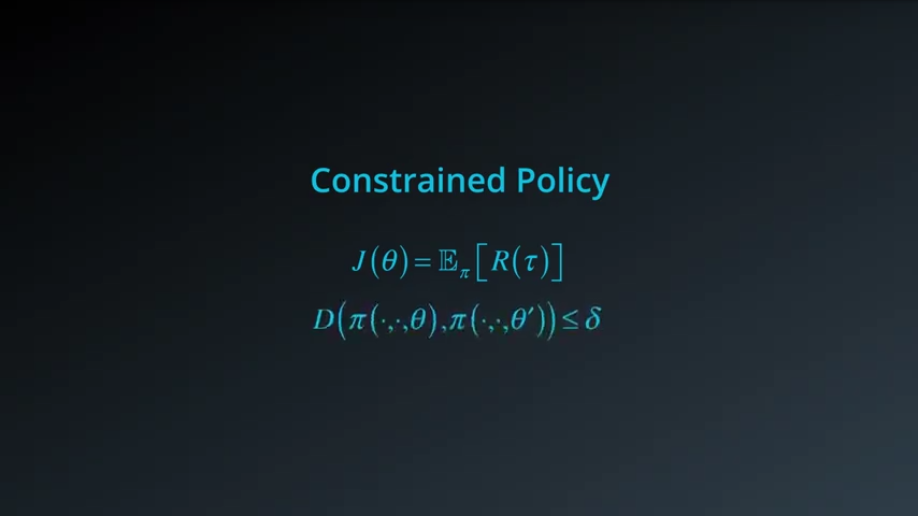

Can also add a penalty, like a regularization to supervised learning machine learning algorithms

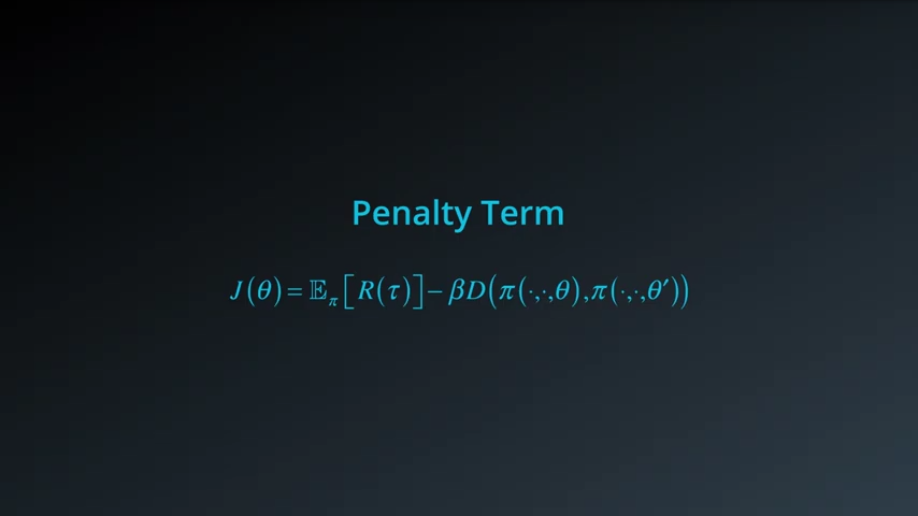

Need a way to compute the difference between two polices. A simple way it to look at the parameter difference of the two policies, and take the norm of the difference, say euclidian norm

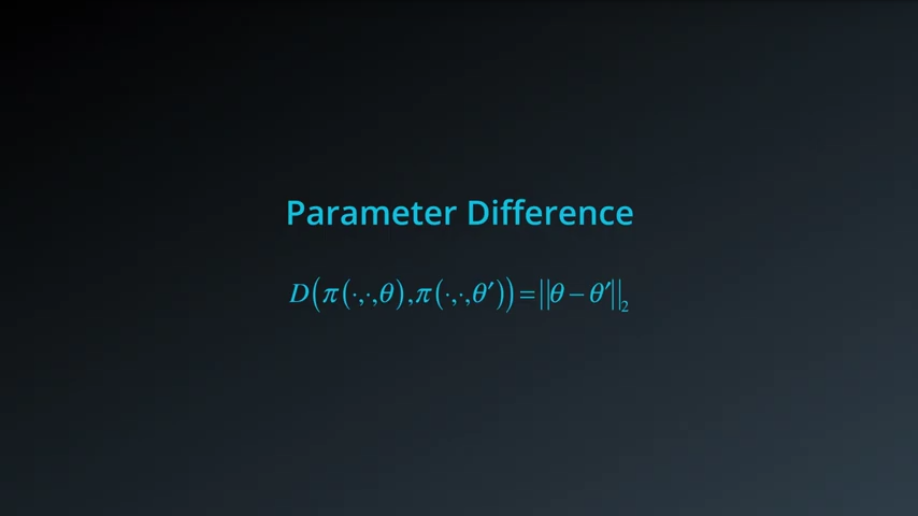

In order to come up with a better distance measure, we need to think of a policy as a probability distribution. Especially useful for a continuous action space. Kullback Leibler divergence is one statistical method to use

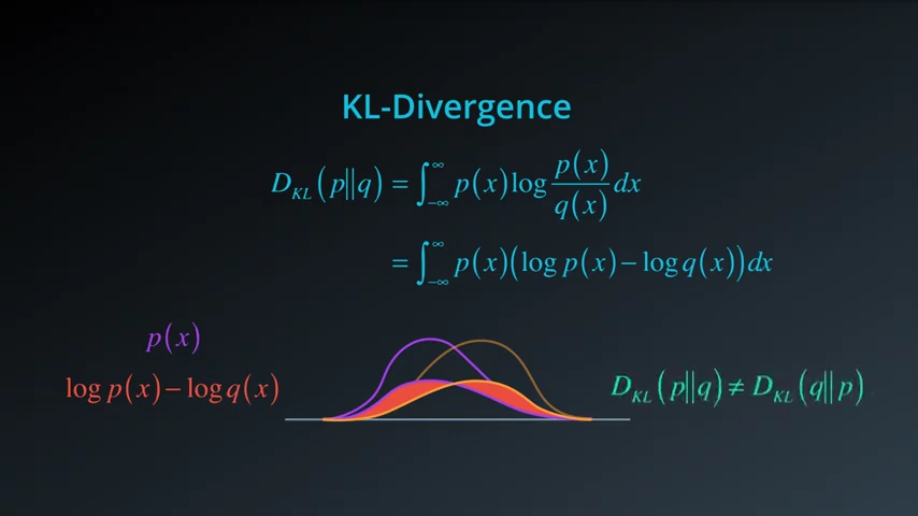

where it is an asymmetric distance measure.

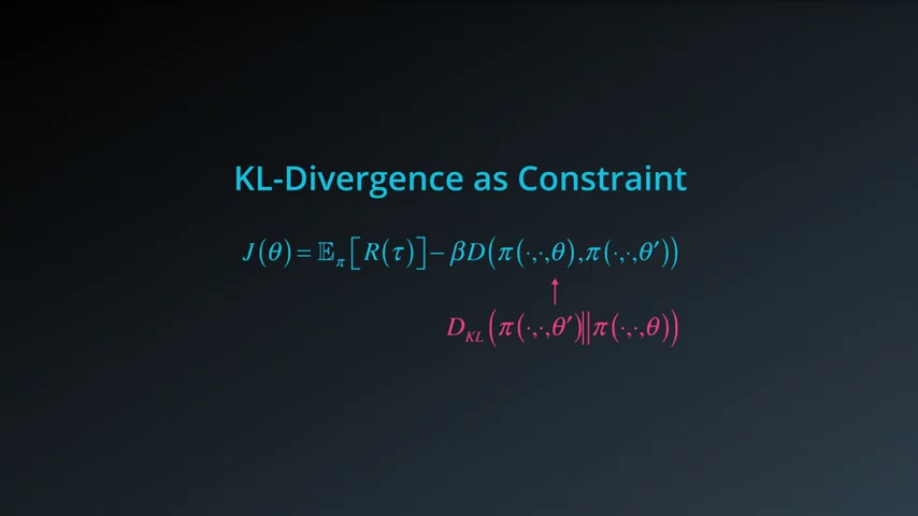


## Recap

* Direction map from states to actions, so don't need value functions
* Good for continuous control tasks with real numbers instead of discrete states
* Stochastic for free!